<a href="https://www.kaggle.com/code/prashantdkpharande/bigmart-sales-prediction-dt-model?scriptVersionId=111089137" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Problem Statement:
### To Build a predective model and find out the sales of each product at perticular Store Outlet.

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.


Variable | Description
----------|--------------
Item_Identifier | Unique product ID
Item_Weight | Weight of product
Item_Fat_Content | Whether the product is low fat or not
Item_Visibility | The % of total display area of all products in a    store allocated to the particular product
Item_Type | The category to which the product belongs
Item_MRP | Maximum Retail Price (list price) of the product
Outlet_Identifier | Unique store ID
Outlet_Establishment_Year | The year in which store was established
Outlet_Size | The size of the store in terms of ground area covered
Outlet_Location_Type | The type of city in which the store is located
Outlet_Type | Whether the outlet is just a grocery store or some sort of supermarket
Item_Outlet_Sales | Sales of the product in the particulat store. This is the outcome variable to be predicted.

In [1]:
import pandas as pd
import numpy as np

import warnings
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,adjusted_rand_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

In [2]:
warnings.filterwarnings(action='ignore')

# Data Loading

In [3]:
df=pd.read_csv('/kaggle/input/big-mart-data/bigmart_data.csv')

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.groupby('Item_Identifier').get_group('FDA15')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
831,FDA15,9.3,Low Fat,0.016055,Dairy,250.2092,OUT045,2002,NaN,Tier 2,Supermarket Type1,5976.2208
2599,FDA15,9.3,Low Fat,0.016019,Dairy,248.5092,OUT035,2004,Small,Tier 2,Supermarket Type1,6474.2392
2643,FDA15,9.3,Low Fat,0.016088,Dairy,249.6092,OUT018,2009,Medium,Tier 3,Supermarket Type2,5976.2208
4874,FDA15,9.3,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,NaN,Tier 3,Grocery Store,498.0184
5413,FDA15,9.3,Low Fat,0.016009,Dairy,250.6092,OUT013,1987,High,Tier 3,Supermarket Type1,6474.2392
6696,FDA15,NaN,Low Fat,0.015945,Dairy,249.5092,OUT027,1985,Medium,Tier 3,Supermarket Type3,6474.2392
7543,FDA15,9.3,LF,0.016113,Dairy,248.8092,OUT017,2007,NaN,Tier 2,Supermarket Type1,5976.2208


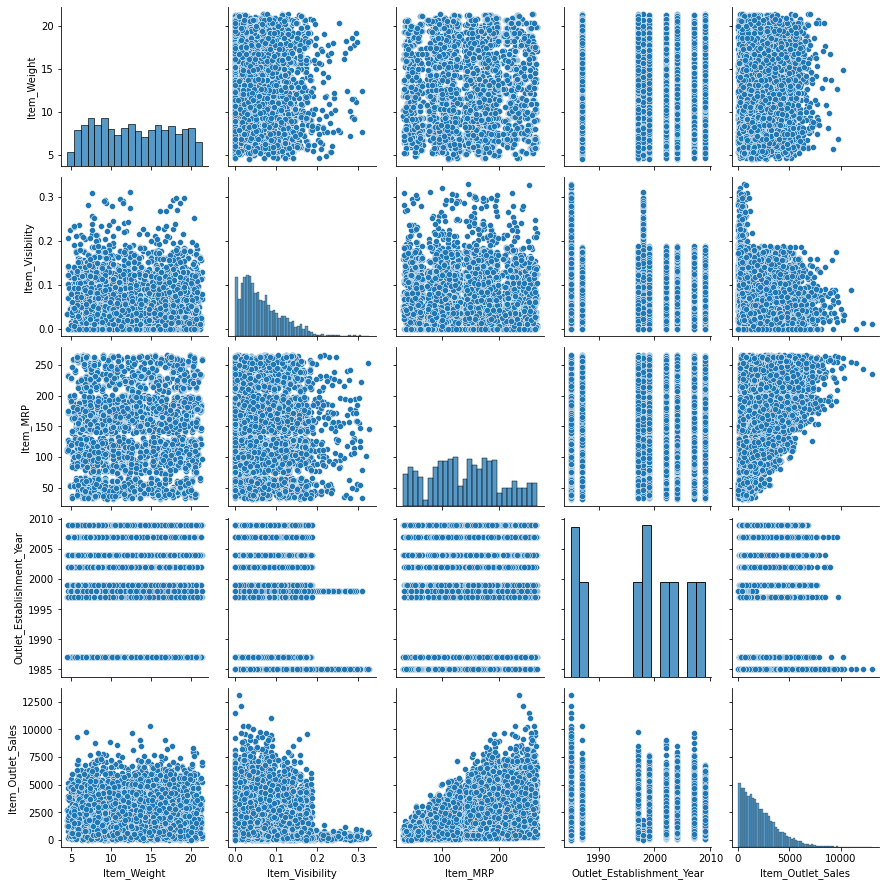

In [6]:
sns.pairplot(df)

# Assumptions made in the Linear regression model

### 1.	Linearity:
#### There should be a linear relation exists between input variable [independent] [x] and output [dependent] [y]
#### To check assumption >> scatter plot
### 2.	Independence (Autocorrelation): 
#### All input variable [independent] should be independent to each other. No relation between independent variables.
### 3.	No Multi-collinearity:
####  There should not be strong relation between each input variable. 
#### To check >> Coefficient of correlation (r) >> -1 to +1 
#### if value is greater than 0.7 or less than -0.7 >>strongly correlated 
#### if value of r 0.3 to -0.3 >>random distribution 
#### to check visually >> pair plot
### 4.	Normality: All Error or Residuals should normally distributed.
### 5.	Homoscedasticity:The Errors or residuals must have constant variance.


# As in this case the first three assumptions made in the Linear regression model fails we are unable to model further.

## Lets consider the data follows the assumptions of linearity and model further for practices

In [7]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<AxesSubplot:>

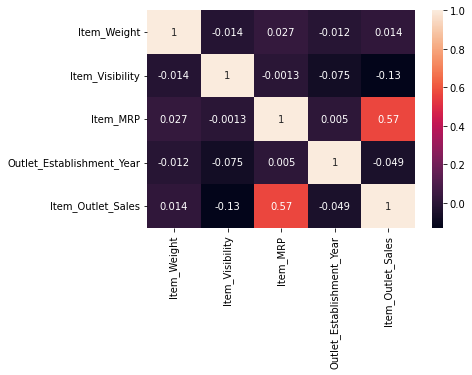

In [8]:
sns.heatmap(df.corr(),annot=True)

In [9]:
df['Item_Weight'].fillna(df['Item_Weight'].mode()[0],inplace=True)

In [10]:
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0],inplace=True)

In [11]:
df['Outlet_Identifier'].value_counts().to_dict()

{'OUT027': 935,
 'OUT013': 932,
 'OUT049': 930,
 'OUT046': 930,
 'OUT035': 930,
 'OUT045': 929,
 'OUT018': 928,
 'OUT017': 926,
 'OUT010': 555,
 'OUT019': 528}

In [12]:
df['Outlet_Identifier'].replace({'OUT027': 6,
 'OUT013': 2,
 'OUT049': 10,
 'OUT046': 9,
 'OUT035': 7,
 'OUT045': 8,
 'OUT018': 4,
 'OUT017': 3,
 'OUT010': 1,
 'OUT019': 5},inplace=True)

In [13]:

df['Outlet_Size'].value_counts().to_dict()

{'Medium': 5203, 'Small': 2388, 'High': 932}

In [14]:
df['Outlet_Size'].replace({'Medium': 2, 'Small': 1, 'High': 3},inplace=True)

In [15]:

df['Outlet_Location_Type'].value_counts().to_dict()

{'Tier 3': 3350, 'Tier 2': 2785, 'Tier 1': 2388}

In [16]:
df['Outlet_Location_Type'].replace({'Tier 3': 3, 'Tier 2': 2, 'Tier 1': 1},inplace=True)

In [17]:

df['Outlet_Type'].value_counts().to_dict()

{'Supermarket Type1': 5577,
 'Grocery Store': 1083,
 'Supermarket Type3': 935,
 'Supermarket Type2': 928}

In [18]:
df['Outlet_Type'].replace({'Supermarket Type1': 2,
 'Grocery Store': 1,
 'Supermarket Type3': 3,
 'Supermarket Type2': 4},inplace=True)

In [19]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,10,1999,2,1,2,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,4,2009,2,3,4,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,10,1999,2,1,2,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1,1998,2,3,1,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,2,1987,3,3,2,994.7052


In [20]:

df['Item_Fat_Content'].value_counts().to_dict()

{'Low Fat': 5089, 'Regular': 2889, 'LF': 316, 'reg': 117, 'low fat': 112}

In [21]:
df['Item_Fat_Content'].replace({'Low Fat': 0, 'Regular': 1, 'LF': 0, 'reg': 1, 'low fat': 0},inplace=True)

In [22]:

df['Item_Type'].value_counts().to_dict()

{'Fruits and Vegetables': 1232,
 'Snack Foods': 1200,
 'Household': 910,
 'Frozen Foods': 856,
 'Dairy': 682,
 'Canned': 649,
 'Baking Goods': 648,
 'Health and Hygiene': 520,
 'Soft Drinks': 445,
 'Meat': 425,
 'Breads': 251,
 'Hard Drinks': 214,
 'Others': 169,
 'Starchy Foods': 148,
 'Breakfast': 110,
 'Seafood': 64}

In [23]:
df['Item_Type'].replace({'Fruits and Vegetables': 1,
 'Snack Foods': 2,
 'Household': 3,
 'Frozen Foods': 4,
 'Dairy': 5,
 'Canned': 6,
 'Baking Goods': 7,
 'Health and Hygiene': 8,
 'Soft Drinks': 9,
 'Meat': 10,
 'Breads': 11,
 'Hard Drinks': 12,
 'Others': 13,
 'Starchy Foods': 14,
 'Breakfast': 15,
 'Seafood': 16},inplace=True)

In [24]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,5,249.8092,10,1999,2,1,2,3735.1380
1,DRC01,5.92,1,0.019278,9,48.2692,4,2009,2,3,4,443.4228
2,FDN15,17.50,0,0.016760,10,141.6180,10,1999,2,1,2,2097.2700
3,FDX07,19.20,1,0.000000,1,182.0950,1,1998,2,3,1,732.3800
4,NCD19,8.93,0,0.000000,3,53.8614,2,1987,3,3,2,994.7052


In [25]:
df.drop('Item_Identifier',inplace=True,axis=1)

In [26]:
x=df.drop('Item_Outlet_Sales',axis=1)
y=df['Item_Outlet_Sales']

# OUTLIER

<AxesSubplot:xlabel='Item_Weight'>

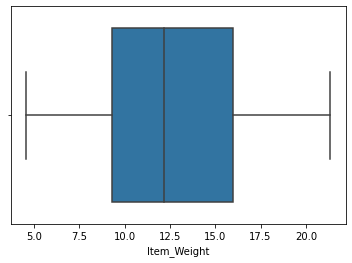

In [27]:
sns.boxplot(x=df['Item_Weight'])

<AxesSubplot:xlabel='Item_Visibility'>

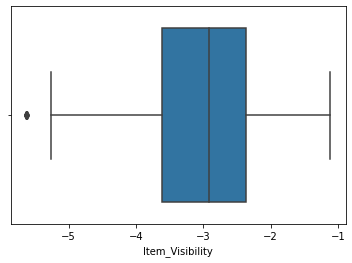

In [28]:
sns.boxplot(x=np.log(df['Item_Visibility']))

In [29]:
df['Item_Visibility']=np.log(df['Item_Visibility'])

<AxesSubplot:xlabel='Item_MRP'>

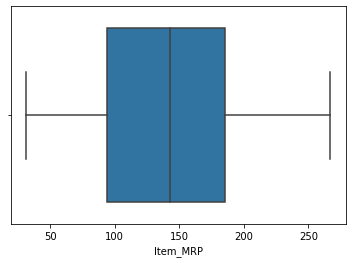

In [30]:
sns.boxplot(x=df['Item_MRP'])

<AxesSubplot:xlabel='Outlet_Establishment_Year'>

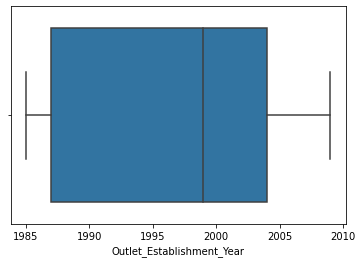

In [31]:
sns.boxplot(x=df['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Item_Outlet_Sales'>

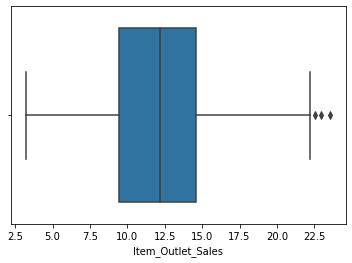

In [32]:
sns.boxplot(x=np.cbrt(df['Item_Outlet_Sales']))

In [33]:
df['Item_Outlet_Sales']=np.cbrt(df['Item_Outlet_Sales'])

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=99)

In [35]:
from sklearn.feature_selection import VarianceThreshold
var_thresh = VarianceThreshold(threshold=0.8)
var_thresh.fit(x_train)
var_thresh.get_support()

array([ True, False, False,  True,  True,  True,  True, False, False,
       False])

<AxesSubplot:>

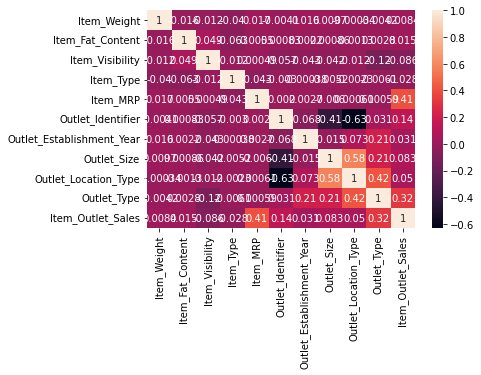

In [36]:
sns.heatmap(df.corr('kendall'),annot=True)

# Normalization

In [37]:
mmscaler = MinMaxScaler()
X_train_norm = mmscaler.fit_transform(x_train)
X_test_norm = mmscaler.transform(x_test)

# LinearRegression

In [38]:
lr_model=LinearRegression()
lr_model.fit(X_train_norm,y_train)

LinearRegression()

In [39]:
y_test_pred=lr_model.predict(X_test_norm)
print(mean_squared_error(y_test,y_test_pred))
print(mean_absolute_error(y_test,y_test_pred))
print(f'r2_score= {r2_score(y_test,y_test_pred)}')


5.962379297389006
1.958777851677185
r2_score= 0.5404681295415854


# Training data Evalution

In [40]:
y_train_pred=lr_model.predict(X_train_norm)
print(mean_squared_error(y_train,y_train_pred))
print(mean_absolute_error(y_train,y_train_pred))
print(f'r2_score= {r2_score(y_train,y_train_pred)}')


6.152825302842971
1.9967251012620066
r2_score= 0.5188711642686243


# Decesion Tree Modeling

In [41]:
dt_model=DecisionTreeRegressor()
dt_model.fit(X_train_norm,y_train)

DecisionTreeRegressor()

In [42]:
y_test_predict1=dt_model.predict(X_test_norm)

In [43]:
print(mean_squared_error(y_test,y_test_predict1))
print(mean_absolute_error(y_test,y_test_predict1))
print(f'r2_score= {r2_score(y_test,y_test_predict1)}')

8.03818072041274
2.2074879039634747
r2_score= 0.3804821804691978


# Hyper Parameter Tuning for DecisionTreeRegressor

In [44]:
hyp={'criterion': ["squared_error", "friedman_mse", "absolute_error", "poisson"], 
     'max_depth':np.arange(0,20),
     'min_samples_split':np.arange(2,30),
     'min_samples_leaf': np.arange(1,20),
     'max_features': np.arange(1,20),
     'max_leaf_nodes':np.arange(1,20),
     'ccp_alpha':np.arange(0,5,0.1)}

In [45]:
rscv_dt_model=RandomizedSearchCV(dt_model,hyp,cv=5)
rscv_dt_model.fit(X_train_norm,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'ccp_alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9]),
                                        'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_e...
                                        'max_depth': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19]),
                                        'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'max_leaf_nodes': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9,

In [46]:
rscv_dt_model.best_params_

{'min_samples_split': 21,
 'min_samples_leaf': 15,
 'max_leaf_nodes': 11,
 'max_features': 6,
 'max_depth': 3,
 'criterion': 'friedman_mse',
 'ccp_alpha': 1.5}

In [47]:
y_test_predict2=rscv_dt_model.predict(X_test_norm)
print(f'mean_squared_error={mean_squared_error(y_test,y_test_predict2)}')
print(f'mean_absolute_error={mean_absolute_error(y_test,y_test_predict2)}')
print(f'r2_score= {r2_score(y_test,y_test_predict2)}')

mean_squared_error=11.267011625067562
mean_absolute_error=2.714804922614693
r2_score= 0.13163006439202762


# Random Forest Modeling

In [48]:
rt_model=RandomForestRegressor()
rt_model.fit(X_train_norm,y_train)
RandomForestRegressor

sklearn.ensemble._forest.RandomForestRegressor

# Random Forest Feature importance

In [49]:
importances=rt_model.feature_importances_
feature_names=x_train.columns
std = np.std([rt_model.feature_importances_ for model in rt_model.estimators_], axis=0)

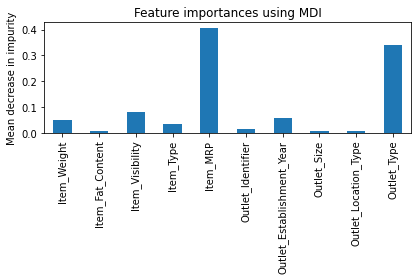

In [50]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
# code was taken from https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

In [51]:
y_test_predict3=rt_model.predict(X_test_norm)
print(f'mean_squared_error={mean_squared_error(y_test,y_test_predict3)}')
print(f'mean_absolute_error={mean_absolute_error(y_test,y_test_predict3)}')
print(f'r2_score= {r2_score(y_test,y_test_predict3)}')

mean_squared_error=4.170780057085228
mean_absolute_error=1.6121128135628404
r2_score= 0.6785500778619817


# Hyperparameter Tuning For Random Forest

In [52]:
hyp1={'criterion':  ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    'max_depth': np.arange(0,20),
    'min_samples_split':np.arange(2,30),
    'min_samples_leaf':np.arange(1,20), 
    'max_features': np.arange(1,20),
    'max_leaf_nodes': np.arange(1,20),
    'ccp_alpha': np.arange(0,10,0.1)}



In [53]:
rscv_rt_model=RandomizedSearchCV(rt_model,hyp1,cv=5)
rscv_rt_model.fit(X_train_norm,y_train)
rscv_rt_model.best_params_

{'min_samples_split': 5,
 'min_samples_leaf': 6,
 'max_leaf_nodes': 18,
 'max_features': 8,
 'max_depth': 14,
 'criterion': 'friedman_mse',
 'ccp_alpha': 1.3}

In [54]:
y_test_predict4=rscv_rt_model.predict(X_test_norm)
print(f'mean_squared_error={mean_squared_error(y_test,y_test_predict4)}')
print(f'mean_absolute_error={mean_absolute_error(y_test,y_test_predict4)}')
print(f'r2_score= {r2_score(y_test,y_test_predict4)}')

mean_squared_error=5.564237288838366
mean_absolute_error=1.8910733371691462
r2_score= 0.571153688572938


# Adaboost Regressor

In [55]:
ad_model=AdaBoostRegressor()
ad_model.fit(X_train_norm,y_train)

AdaBoostRegressor()

In [56]:
y_test_predict5=ad_model.predict(X_test_norm)
print(f'mean_squared_error={mean_squared_error(y_test,y_test_predict5)}')
print(f'mean_absolute_error={mean_absolute_error(y_test,y_test_predict5)}')
print(f'r2_score= {r2_score(y_test,y_test_predict5)}')

mean_squared_error=4.565931687655737
mean_absolute_error=1.6973924994293863
r2_score= 0.6480949929279728


# Hyper parameter Tuneing - Adaboost

In [57]:
hyp3={'n_estimators': [250],
      'learning_rate':np.arange(0.1,2,0.01),
      'loss':['linear', 'square', 'exponential']}

In [58]:
rscv_adb_model=RandomizedSearchCV(ad_model,hyp3,cv=5)
rscv_adb_model.fit(X_train_norm,y_train)
rscv_adb_model.best_params_

{'n_estimators': 250,
 'loss': 'exponential',
 'learning_rate': 0.15999999999999998}

In [59]:
y_test_predict5=rscv_adb_model.predict(X_test_norm)
print(f'mean_squared_error={mean_squared_error(y_test,y_test_predict5)}')
print(f'mean_absolute_error={mean_absolute_error(y_test,y_test_predict5)}')
print(f'r2_score= {r2_score(y_test,y_test_predict5)}')

mean_squared_error=4.671599717598777
mean_absolute_error=1.7260616439245602
r2_score= 0.6399509576317539


# XG-Boost Regressor

In [60]:
xgb_model=XGBRegressor()
xgb_model.fit(X_train_norm,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [61]:
y_test_predict6=xgb_model.predict(X_test_norm)
print(f'mean_squared_error={mean_squared_error(y_test,y_test_predict6)}')
print(f'mean_absolute_error={mean_absolute_error(y_test,y_test_predict6)}')
print(f'r2_score= {r2_score(y_test,y_test_predict6)}')

mean_squared_error=4.320204503192177
mean_absolute_error=1.6313305045082234
r2_score= 0.6670336526587397


# Hyper parameter Tuneing - Xgboost

In [62]:
hyp6={'gamma':np.arange(0,2,0.1),
      'learning_rate':np.arange(0,2,0.01),
      'max_depth':np.arange(0,10),
      'reg_alpha':np.arange(0,2,0.01),
      'reg_lambda':np.arange(0,2,0.01)}

In [63]:
rscv_Xgboost_model=RandomizedSearchCV(xgb_model,hyp6,cv=5)
rscv_Xgboost_model.fit(X_train_norm,y_train)
rscv_Xgboost_model.best_params_

{'reg_lambda': 1.1400000000000001,
 'reg_alpha': 0.14,
 'max_depth': 2,
 'learning_rate': 0.17,
 'gamma': 0.6000000000000001}

In [64]:
y_test_predict7=rscv_Xgboost_model.predict(X_test_norm)
print(f'mean_squared_error={mean_squared_error(y_test,y_test_predict7)}')
print(f'mean_absolute_error={mean_absolute_error(y_test,y_test_predict7)}')
print(f'r2_score= {r2_score(y_test,y_test_predict7)}')

mean_squared_error=3.7831237338997767
mean_absolute_error=1.523926100892211
r2_score= 0.7084274852530968


# With failure of linarity assumption the model is not working well 